In [13]:
import json 
import pandas as pd
import numpy as np
import proplot as pplot
import matplotlib.pyplot as plt

In [14]:
CFs=[1,1.5,2,2.5,3]
results=[]
for CF in CFs:
    file_name=f"{CF}.json"
    result={}
    with open(file_name,"r") as fp:
        text=json.load(fp)
        result["CF"]=CF
        result["mass CaCO3"]=text["plant"]["calc"]["mass_camix_1"]+text["plant"]["calc"]["mass_camix_2"]
        result["calciner cost"]=text["metrics"]["economic"]["construction"]["equipment"]["Ccalc"]
        result["CO2 compression cost"]=text["metrics"]["economic"]["construction"]["equipment"]["CCO2ct"]
        result["calciner side HEN cost"]=text["metrics"]["economic"]["construction"]["equipment"]["CHENCalc"]
    results.append(result)
df=pd.DataFrame(results)
df.head(10)

,CF,mass CaCO3,calciner cost,CO2 compression cost,calciner side HEN cost
0,1.0,14.355112,25.549611,12.877234,4.469135
1,1.5,21.532668,31.039027,17.714070,5.864144
2,2.0,28.710224,35.635159,22.211745,7.110720
3,2.5,35.887781,39.663908,26.472954,8.257399
4,3.0,43.065337,43.291487,30.554730,9.330281


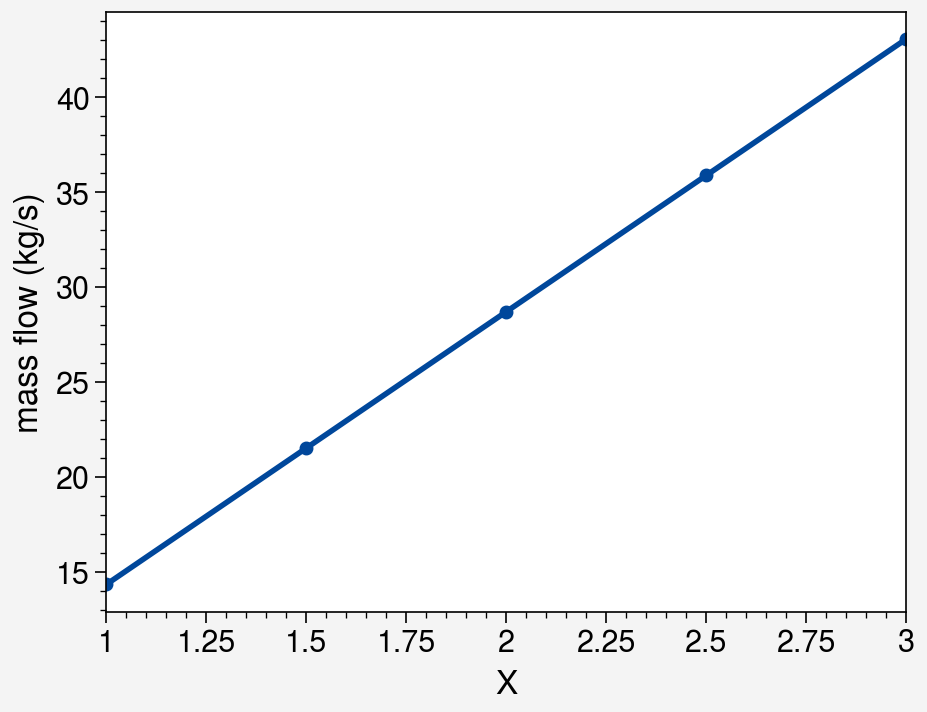

In [15]:
c1 = pplot.scale_luminance('cerulean', 0.5)
c2 = pplot.scale_luminance('red', 0.5)

with pplot.rc.context({'lines.linewidth': 2,"axes.labelsize":12,"tick.labelsize":11,
        "lines.marker":"o","lines.markersize":4,"legend.fontsize":14,"grid":False}):
        fig, axs = pplot.subplots(refaspect=(4, 3), axwidth=4,ncols=1, nrows=1, share=False)
        axs[0].plot(df['CF'], df['mass CaCO3'],label="CaCO$_{3}$",color=c1)
        axs[0].format(xlabel="X",ylabel="mass flow (kg/s)")
        # axs[0].legend(loc="best", ncols=1, fancybox=True)

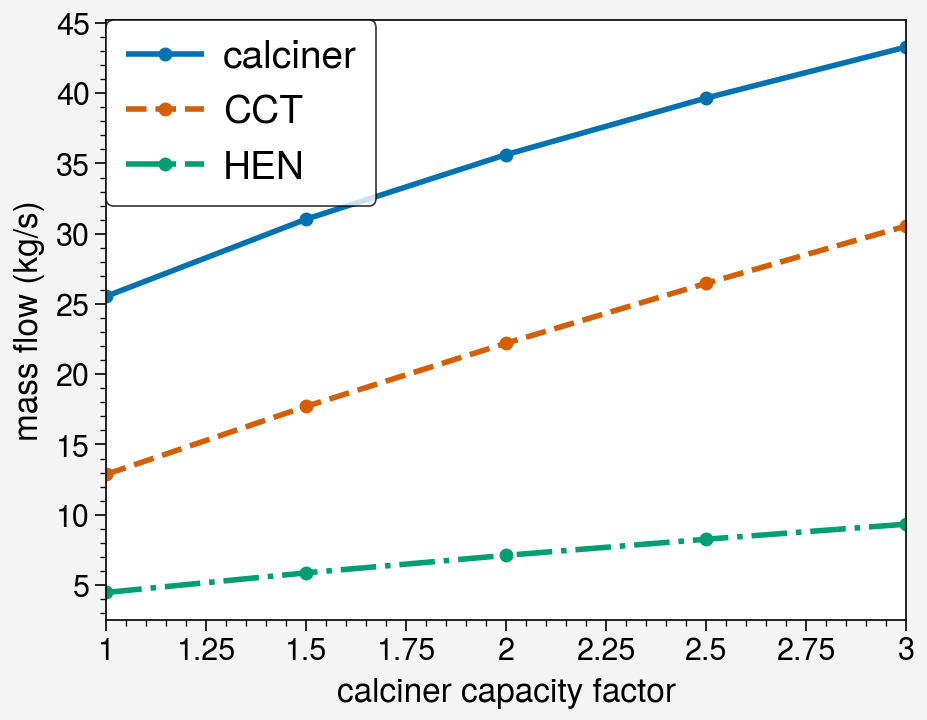

In [17]:
# c1 = pplot.scale_luminance('cerulean', 0.5)
# c2 = pplot.scale_luminance('red', 0.5)

with pplot.rc.context({'lines.linewidth': 2,"axes.labelsize":12,"tick.labelsize":11,
        "lines.marker":"o","lines.markersize":4,"legend.fontsize":14,"grid":False}):
        fig, axs = pplot.subplots(refaspect=(4, 3), axwidth=4,ncols=1, nrows=1, share=False)
        axs[0].plot(df['CF'], df['calciner cost'],label="calciner")
        axs[0].plot(df['CF'], df['CO2 compression cost'],linestyle="--",label="CCT")
        axs[0].plot(df['CF'], df['calciner side HEN cost'],linestyle="-.",label="HEN")
        axs[0].format(xlabel="calciner capacity factor",ylabel="capital cost (million RMB)")
        axs[0].legend(loc="best", ncols=1, fancybox=True)
        fig.savefig("./analysis.jpg", bbox_inches='tight')
        